# Multi Layer Perceptron (MLP)

## 1D Poisson Equation

We are solving the 1D Poisson equation on the domain $[0, 1]$ with homogeneous Dirichlet boundary conditions.

The problem is defined as: $$ -\frac{d^2u}{dx^2} = f(x), \quad x \in [0, 1]$$ with boundary conditions $$u(0) = 0, \quad u(1) = 0 $$

For this specific case, we define the source function $f(x)$ as: $$ f(x) = \pi \sin(\pi x) $$

The exact analytical solution $u(x)$ to this problem is: $$ u(x) = \frac{1}{\pi} \sin(\pi x) $$

We can verify this solution. The first derivative is $u'(x) = \cos(\pi x)$, and the second derivative is $u''(x) = -\pi \sin(\pi x)$. Plugging this back into the original equation gives us $-\frac{d^2u}{dx^2} = -(-\pi \sin(\pi x)) = \pi \sin(\pi x)$, which matches our source function. The boundary conditions are also satisfied: $u(0) = \frac{1}{\pi}\sin(0) = 0$ and $u(1) = \frac{1}{\pi}\sin(\pi) = 0$.


--- Training NonLinearMLP_NumPy with Manual SGD ---
Epoch [5000/50000], Loss: 0.00069251
Epoch [10000/50000], Loss: 0.00004908
Epoch [15000/50000], Loss: 0.00000236
Epoch [20000/50000], Loss: 0.00000208
Epoch [25000/50000], Loss: 0.00000208
Epoch [30000/50000], Loss: 0.00000207
Epoch [35000/50000], Loss: 0.00000207
Epoch [40000/50000], Loss: 0.00000207
Epoch [45000/50000], Loss: 0.00000207
Epoch [50000/50000], Loss: 0.00000207
Training complete.


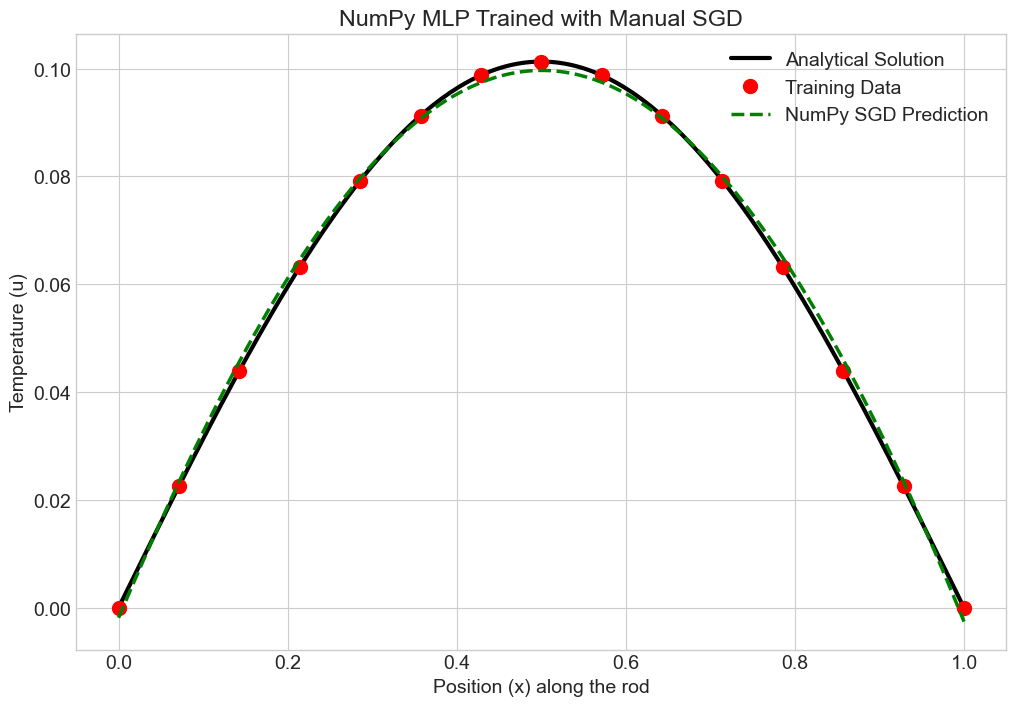

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set up plot styles
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

# --- Set the random seed for reproducibility ---
seed = 42
np.random.seed(seed)

# -----------------------------------------------------------------------------
# 1. Generate Training Data
# -----------------------------------------------------------------------------
def analytical_solution(x):
    return (1 / (np.pi**2)) * np.sin(np.pi * x)

num_training_points = 15
x_train = np.linspace(0, 1, num_training_points, dtype=np.float32).reshape(-1, 1)
u_train = analytical_solution(x_train)

# -----------------------------------------------------------------------------
# 2. Define the Neural Network with Proper Initialization
# -----------------------------------------------------------------------------
class NonLinearMLP_NumPy:
    def __init__(self, input_size, hidden_size, output_size):
        # Glorot Initialization
        limit_w1 = np.sqrt(6 / (input_size + hidden_size))
        self.W1 = np.random.uniform(-limit_w1, limit_w1, (input_size, hidden_size)).astype(np.float32)
        self.b1 = np.zeros((1, hidden_size), dtype=np.float32)
        
        limit_w2 = np.sqrt(6 / (hidden_size + output_size))
        self.W2 = np.random.uniform(-limit_w2, limit_w2, (hidden_size, output_size)).astype(np.float32)
        self.b2 = np.zeros((1, output_size), dtype=np.float32)
        
        self.x = None
        self.z1 = None
        self.a1 = None

    def forward(self, x):
        self.x = x
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        y_pred = np.dot(self.a1, self.W2) + self.b2
        return y_pred

# -----------------------------------------------------------------------------
# 3. Manual Training with SGD
# -----------------------------------------------------------------------------
def train_model_manual_sgd(model, x_data, y_data, epochs=50000, lr=0.1):
    n_samples = len(y_data)
    print(f"\n--- Training {model.__class__.__name__} with Manual SGD ---")

    for epoch in range(epochs):
        y_pred = model.forward(x_data)
        loss = np.mean((y_pred - y_data)**2)
        
        # Backpropagation to get gradients
        grad_y_pred = 2 * (y_pred - y_data) / n_samples
        grad_W2 = np.dot(model.a1.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0, keepdims=True)
        grad_a1 = np.dot(grad_y_pred, model.W2.T)
        grad_z1 = grad_a1 * (1 - np.tanh(model.z1)**2)
        grad_W1 = np.dot(model.x.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)
        
        # --- The key change: Simple Gradient Descent update rule ---
        model.W1 -= lr * grad_W1
        model.b1 -= lr * grad_b1
        model.W2 -= lr * grad_W2
        model.b2 -= lr * grad_b2
        
        if (epoch + 1) % 5000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.8f}')
    print("Training complete.")
    return model

# Instantiate and train the model
numpy_model_sgd = NonLinearMLP_NumPy(input_size=1, hidden_size=32, output_size=1)
train_model_manual_sgd(numpy_model_sgd, x_train, u_train)

# -----------------------------------------------------------------------------
# 4. Visualize the Results
# -----------------------------------------------------------------------------
x_plot = np.linspace(0, 1, 200, dtype=np.float32).reshape(-1, 1)
u_pred_numpy = numpy_model_sgd.forward(x_plot)
u_true_plot = analytical_solution(x_plot)

plt.figure(figsize=(12, 8))
plt.title("NumPy MLP Trained with Manual SGD")
plt.xlabel("Position (x) along the rod")
plt.ylabel("Temperature (u)")
plt.plot(x_plot, u_true_plot, 'k-', label='Analytical Solution', linewidth=3)
plt.plot(x_train, u_train, 'ro', label='Training Data', markersize=10)
plt.plot(x_plot, u_pred_numpy, 'g--', label='NumPy SGD Prediction', linewidth=2.5)
plt.legend(loc='best')
plt.show()

Generated 15 training data points.

--- Training MLP with PyTorch SGD (lr=0.1) ---
Epoch [5000/50000], Loss: 0.00007349
Epoch [10000/50000], Loss: 0.00000442
Epoch [15000/50000], Loss: 0.00000363
Epoch [20000/50000], Loss: 0.00000345
Epoch [25000/50000], Loss: 0.00000328
Epoch [30000/50000], Loss: 0.00000312
Epoch [35000/50000], Loss: 0.00000298
Epoch [40000/50000], Loss: 0.00000284
Epoch [45000/50000], Loss: 0.00000272
Epoch [50000/50000], Loss: 0.00000261
Training complete.


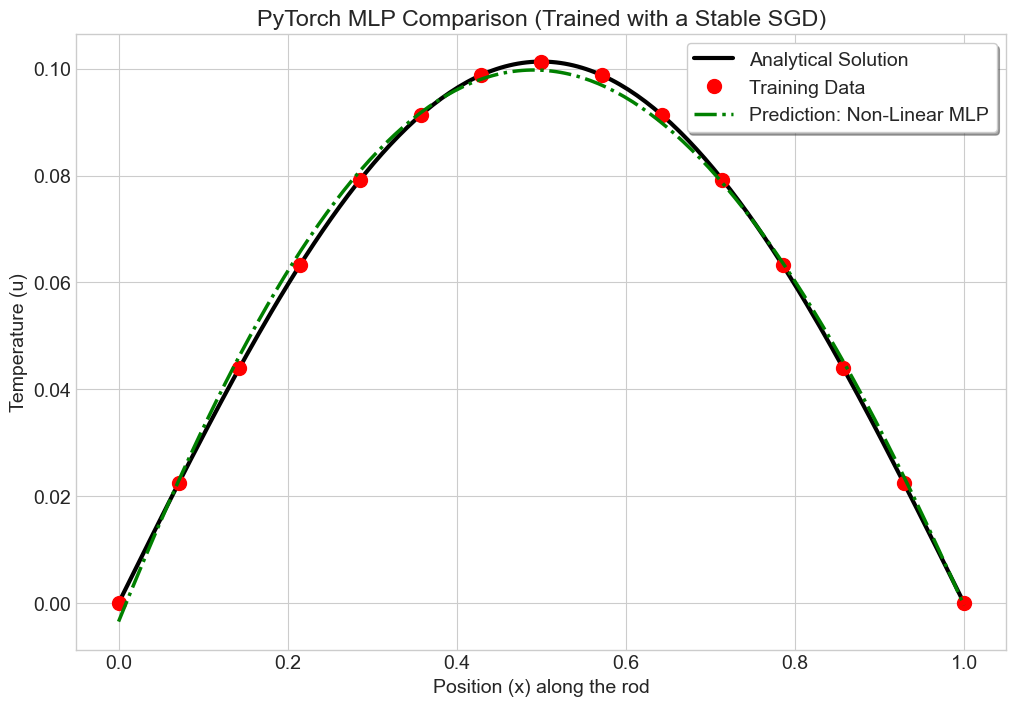

In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set up plot styles
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (12, 8)})

# Set the random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# -----------------------------------------------------------------------------
# 1. Generate Training Data
# -----------------------------------------------------------------------------
def analytical_solution(x):
    return (1 / (np.pi**2)) * np.sin(np.pi * x)

num_training_points = 15
x_train = torch.linspace(0, 1, num_training_points, dtype=torch.float32).view(-1, 1)
u_train = torch.tensor(analytical_solution(x_train.numpy()), dtype=torch.float32)

print(f"Generated {num_training_points} training data points.")

# -----------------------------------------------------------------------------
# 2. Define the Neural Network Models
# -----------------------------------------------------------------------------
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        torch.manual_seed(seed)
        self.hidden = nn.Linear(1, 32)
        self.activation = nn.Tanh()
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# -----------------------------------------------------------------------------
# 3. Training Function
# -----------------------------------------------------------------------------
def train_model(model, x_data, y_data, epochs=50000, lr=0.1):
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    print(f"\n--- Training {model.__class__.__name__} with PyTorch SGD (lr={lr}) ---")
    for epoch in range(epochs):
        predictions = model(x_data)
        loss = criterion(predictions, y_data)
        
        # Check for nan loss to stop early
        if torch.isnan(loss):
            print(f"Loss is NaN at epoch {epoch}. Stopping training.")
            break
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 5000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}')
    print("Training complete.")
    return model

# Instantiate and train both models with the corrected learning rate
torch.manual_seed(seed)
nonlinear_model = MLP()
train_model(nonlinear_model, x_train, u_train)

# -----------------------------------------------------------------------------
# 4. Visualize and Compare the Results
# -----------------------------------------------------------------------------
x_plot = torch.linspace(0, 1, 200, dtype=torch.float32).view(-1, 1)

with torch.no_grad():
    u_pred_nonlinear = nonlinear_model(x_plot)

u_true_plot = analytical_solution(x_plot.numpy())

plt.figure(figsize=(12, 8))
plt.title("PyTorch MLP Comparison (Trained with a Stable SGD)")
plt.xlabel("Position (x) along the rod")
plt.ylabel("Temperature (u)")
plt.plot(x_plot.numpy(), u_true_plot, 'k-', label='Analytical Solution', linewidth=3)
plt.plot(x_train.numpy(), u_train.numpy(), 'ro', label='Training Data', markersize=10)
plt.plot(x_plot.numpy(), u_pred_nonlinear.numpy(), 'g-.', label='Prediction: Non-Linear MLP', linewidth=2.5)
plt.legend(loc='best', frameon=True, shadow=True)
plt.show()

### Non-linearity through ReLU

Dataset shape: torch.Size([31, 2])
Labels shape: torch.Size([31, 1])
Class 0 samples: 18
Class 1 samples: 13
TRAINING SINGLE LAYER ReLU NETWORK

Model Architecture:
SingleLayerReLU(
  (layer): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

Total parameters: 41
Training single layer ReLU network with MSE loss...
Epochs: 5000, Learning rate: 0.01
--------------------------------------------------
Epoch [1000/5000], Loss: 0.031226, Accuracy: 0.5806
Epoch [2000/5000], Loss: 0.030159, Accuracy: 0.6452
Epoch [3000/5000], Loss: 0.029406, Accuracy: 0.6129
Epoch [4000/5000], Loss: 0.028796, Accuracy: 0.5806
Epoch [5000/5000], Loss: 0.028778, Accuracy: 0.6129
Training complete!
Final Loss: 0.028778
Final Accuracy: 0.6129


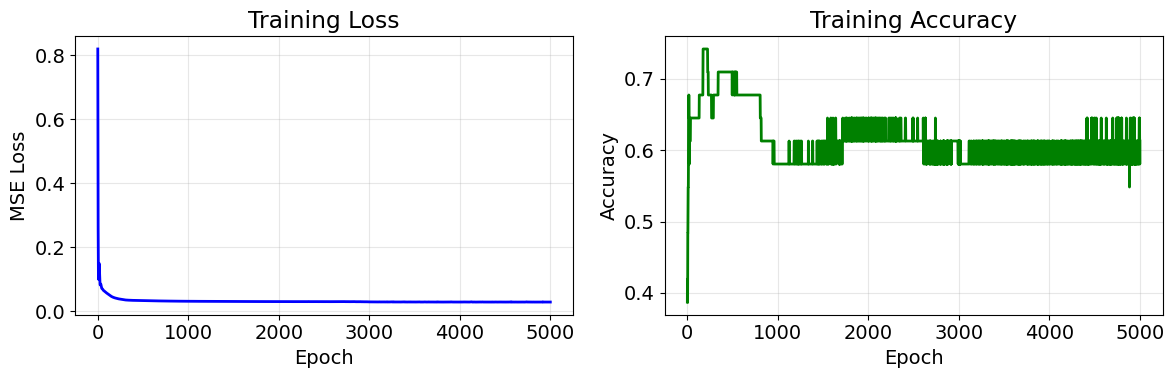

/var/folders/w8/xz590jyd7r36zmxcspgzj3z40000gn/T/ipykernel_41455/1000757592.py:121: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
/var/folders/w8/xz590jyd7r36zmxcspgzj3z40000gn/T/ipykernel_41455/1000757592.py:122: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.arange(y_min, y_max, 0.1))


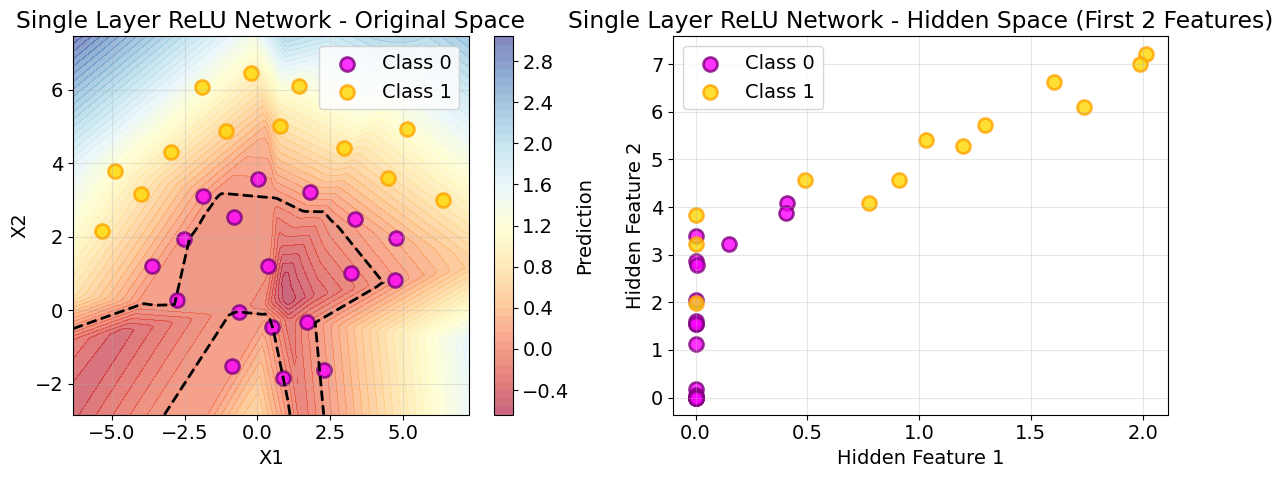

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# -----------------------------------------------------------------------------
# 1. Data Definition (from the interactive demo)
# -----------------------------------------------------------------------------

# Class 0 data points (magenta in the demo)
class0_X = [
    [-2.75, 0.27], [-3.63, 1.20], [-2.51, 1.95], [-1.85, 3.12], [-0.81, 2.54], [0.03, 3.58], 
    [1.82, 3.23], [3.37, 2.48], [4.76, 1.96], [4.74, 0.82], [3.22, 1.02], [0.38, 1.22],
    [-0.62, -0.04], [0.52, -0.44], [1.72, -0.31], [2.29, -1.63], [0.87, -1.84], [-0.87, -1.52]
]

# Class 1 data points (gold in the demo)
class1_X = [
    [-5.33, 2.15], [-4.88, 3.79], [-3.99, 3.16], [-2.98, 4.30], [-1.91, 6.07], [-1.06, 4.89], 
    [0.78, 5.01], [-0.22, 6.47], [1.43, 6.11], [2.98, 4.41], [4.50, 3.61], [5.13, 4.95], [6.37, 3.01]
]

# Convert to PyTorch tensors
X_class0 = torch.tensor(class0_X, dtype=torch.float32)
X_class1 = torch.tensor(class1_X, dtype=torch.float32)

# Combine data and create labels
X = torch.cat([X_class0, X_class1], dim=0)
y = torch.cat([torch.zeros(len(class0_X)), torch.ones(len(class1_X))], dim=0).view(-1, 1)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class 0 samples: {(y == 0).sum().item()}")
print(f"Class 1 samples: {(y == 1).sum().item()}")

# -----------------------------------------------------------------------------
# 2. Neural Network Definition - JUST 1 HIDDEN LAYER
# -----------------------------------------------------------------------------

class SingleLayerReLU(nn.Module):
    def __init__(self, input_size=2, hidden_size=10):
        super(SingleLayerReLU, self).__init__()
        # Only 1 hidden layer: input -> hidden -> output
        self.layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # Single hidden layer with ReLU
        h = self.layer(x)
        h = self.relu(h)
        # Direct output (no sigmoid, we'll use raw output for MSE)
        out = self.output(h)
        return out
    
    def get_hidden_features(self, x):
        """Get the hidden layer features after ReLU activation"""
        h = self.layer(x)
        h = self.relu(h)
        return h

# -----------------------------------------------------------------------------
# 3. Training Setup
# -----------------------------------------------------------------------------

def train_model(model, X, y, epochs=5000, lr=0.01):
    """Train the neural network using MSE loss"""
    criterion = nn.MSELoss()  # Using MSE loss as requested
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    losses = []
    accuracies = []
    
    print(f"Training single layer ReLU network with MSE loss...")
    print(f"Epochs: {epochs}, Learning rate: {lr}")
    print("-" * 50)
    
    for epoch in range(epochs):
        # Forward pass
        predictions = model(X)
        loss = criterion(predictions, y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy (convert predictions to 0/1 using sign)
        predicted_classes = (predictions > 0).float()
        accuracy = (predicted_classes == y).float().mean()
        
        losses.append(loss.item())
        accuracies.append(accuracy.item())
        
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}, Accuracy: {accuracy.item():.4f}')
    
    print(f"Training complete!")
    print(f"Final Loss: {losses[-1]:.6f}")
    print(f"Final Accuracy: {accuracies[-1]:.4f}")
    
    return losses, accuracies

# -----------------------------------------------------------------------------
# 4. Visualization Functions
# -----------------------------------------------------------------------------

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """Plot the decision boundary of the trained model"""
    plt.figure(figsize=(12, 5))
    
    # Create a mesh for the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Make predictions on the mesh
    mesh_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(mesh_points).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot 1: Original space with decision boundary
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    plt.colorbar(label='Prediction')
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='--')
    
    # Plot the data points
    class0_idx = (y == 0).squeeze()
    class1_idx = (y == 1).squeeze()
    plt.scatter(X[class0_idx, 0], X[class0_idx, 1], c='magenta', s=100, edgecolors='purple', 
                linewidth=2, label='Class 0', alpha=0.8)
    plt.scatter(X[class1_idx, 0], X[class1_idx, 1], c='gold', s=100, edgecolors='orange', 
                linewidth=2, label='Class 1', alpha=0.8)
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{title} - Original Space')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Hidden feature space (first 2 dimensions)
    plt.subplot(1, 2, 2)
    with torch.no_grad():
        hidden_features = model.get_hidden_features(X)
    
    # Plot first two hidden features
    plt.scatter(hidden_features[class0_idx, 0], hidden_features[class0_idx, 1], 
                c='magenta', s=100, edgecolors='purple', linewidth=2, label='Class 0', alpha=0.8)
    plt.scatter(hidden_features[class1_idx, 0], hidden_features[class1_idx, 1], 
                c='gold', s=100, edgecolors='orange', linewidth=2, label='Class 1', alpha=0.8)
    
    plt.xlabel('Hidden Feature 1')
    plt.ylabel('Hidden Feature 2')
    plt.title(f'{title} - Hidden Space (First 2 Features)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_training_curves(losses, accuracies):
    """Plot training loss and accuracy curves"""
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, 'b-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, 'g-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 5. Experiment with Different Hidden Layer Sizes
# -----------------------------------------------------------------------------

def compare_hidden_sizes():
    """Compare models with different hidden layer sizes"""
    hidden_sizes = [5, 10, 20, 50]
    results = {}
    
    print("\n" + "="*60)
    print("COMPARING DIFFERENT HIDDEN LAYER SIZES")
    print("="*60)
    
    for hidden_size in hidden_sizes:
        print(f"\nTraining with hidden size: {hidden_size}")
        
        # Initialize model - just 1 hidden layer
        torch.manual_seed(42)  # For fair comparison
        model = SingleLayerReLU(input_size=2, hidden_size=hidden_size)
        
        # Train model
        losses, accuracies = train_model(model, X, y, epochs=3000, lr=0.01)
        
        # Store results
        results[hidden_size] = {
            'model': model,
            'final_loss': losses[-1],
            'final_accuracy': accuracies[-1],
            'losses': losses,
            'accuracies': accuracies
        }
        
        # Plot decision boundary
        plot_decision_boundary(model, X, y, f"Hidden Size: {hidden_size}")
    
    # Plot comparison
    plt.figure(figsize=(14, 5))
    
    # Loss comparison
    plt.subplot(1, 2, 1)
    for hidden_size in hidden_sizes:
        plt.plot(results[hidden_size]['losses'], 
                label=f'Hidden Size {hidden_size} (Final: {results[hidden_size]["final_loss"]:.4f})',
                linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Accuracy comparison
    plt.subplot(1, 2, 2)
    for hidden_size in hidden_sizes:
        plt.plot(results[hidden_size]['accuracies'], 
                label=f'Hidden Size {hidden_size} (Final: {results[hidden_size]["final_accuracy"]:.4f})',
                linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SUMMARY OF RESULTS")
    print("="*60)
    for hidden_size in hidden_sizes:
        print(f"Hidden Size {hidden_size:2d}: Loss = {results[hidden_size]['final_loss']:.6f}, "
              f"Accuracy = {results[hidden_size]['final_accuracy']:.4f}")
    
    return results

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Train a single model first
    print("="*60)
    print("TRAINING SINGLE LAYER ReLU NETWORK")
    print("="*60)
    
    # Initialize model - just 1 hidden layer
    model = SingleLayerReLU(input_size=2, hidden_size=10)
    
    # Display model architecture
    print("\nModel Architecture:")
    print(model)
    print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
    
    # Train the model
    losses, accuracies = train_model(model, X, y, epochs=5000, lr=0.01)
    
    # Plot results
    plot_training_curves(losses, accuracies)
    plot_decision_boundary(model, X, y, "Single Layer ReLU Network")

### MLP

Generated training data:
Simple case: 20 points
High frequency case: 30 points

TRAINING MODELS FOR SIMPLE CASE

--- Training SingleLayer ---
Epoch [2000/15000], Loss: 0.00000410
Epoch [4000/15000], Loss: 0.00000278
Epoch [6000/15000], Loss: 0.00000232
Epoch [8000/15000], Loss: 0.00000200
Epoch [10000/15000], Loss: 0.00000184
Epoch [12000/15000], Loss: 0.00000164
Epoch [14000/15000], Loss: 0.00000154
Training SingleLayer complete. Final loss: 0.00000142

--- Training MLP ---
Epoch [2000/15000], Loss: 0.00000090
Epoch [4000/15000], Loss: 0.00000017
Epoch [6000/15000], Loss: 0.00000029
Epoch [8000/15000], Loss: 0.00000017
Epoch [10000/15000], Loss: 0.00000009
Epoch [12000/15000], Loss: 0.00011180
Epoch [14000/15000], Loss: 0.00000004
Training MLP complete. Final loss: 0.00001421

Final MSE - Single Layer: 0.00000121
Final MSE - MLP: 0.00000424

TRAINING MODELS FOR HIGH FREQUENCY CASE

--- Training SingleLayer ---
Epoch [2000/15000], Loss: 0.46367347
Epoch [4000/15000], Loss: 0.46283844
E

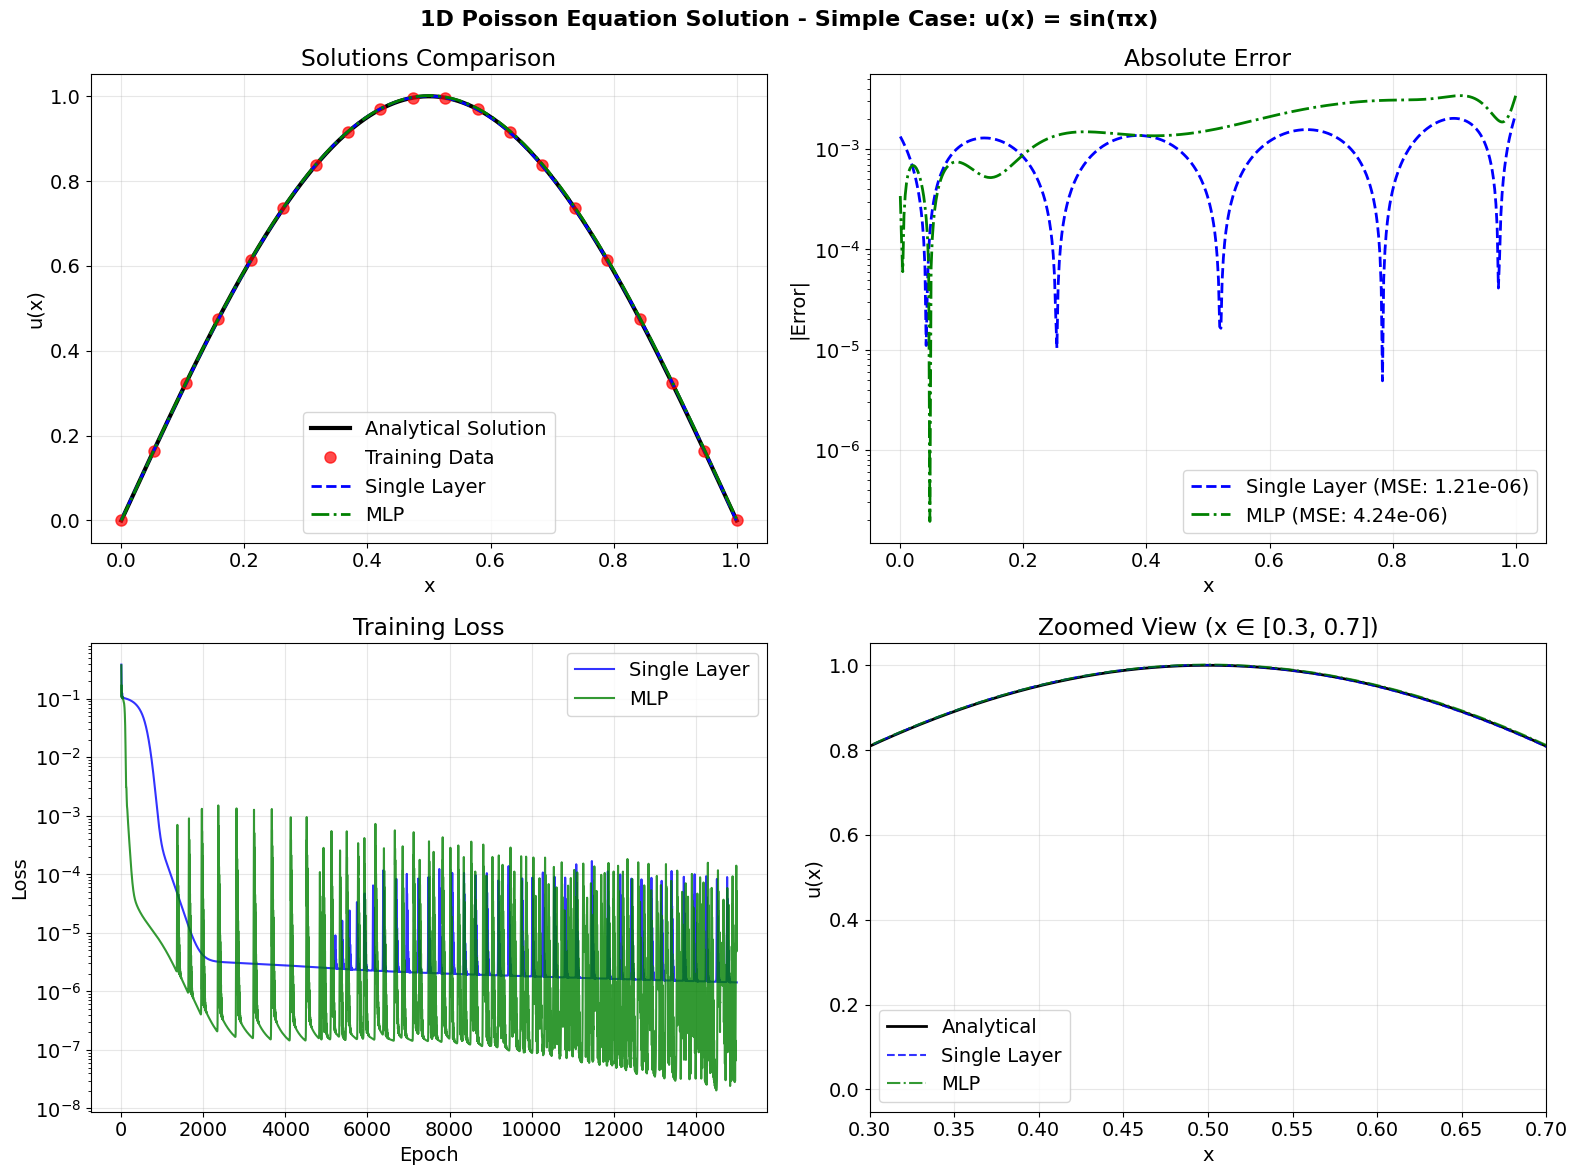

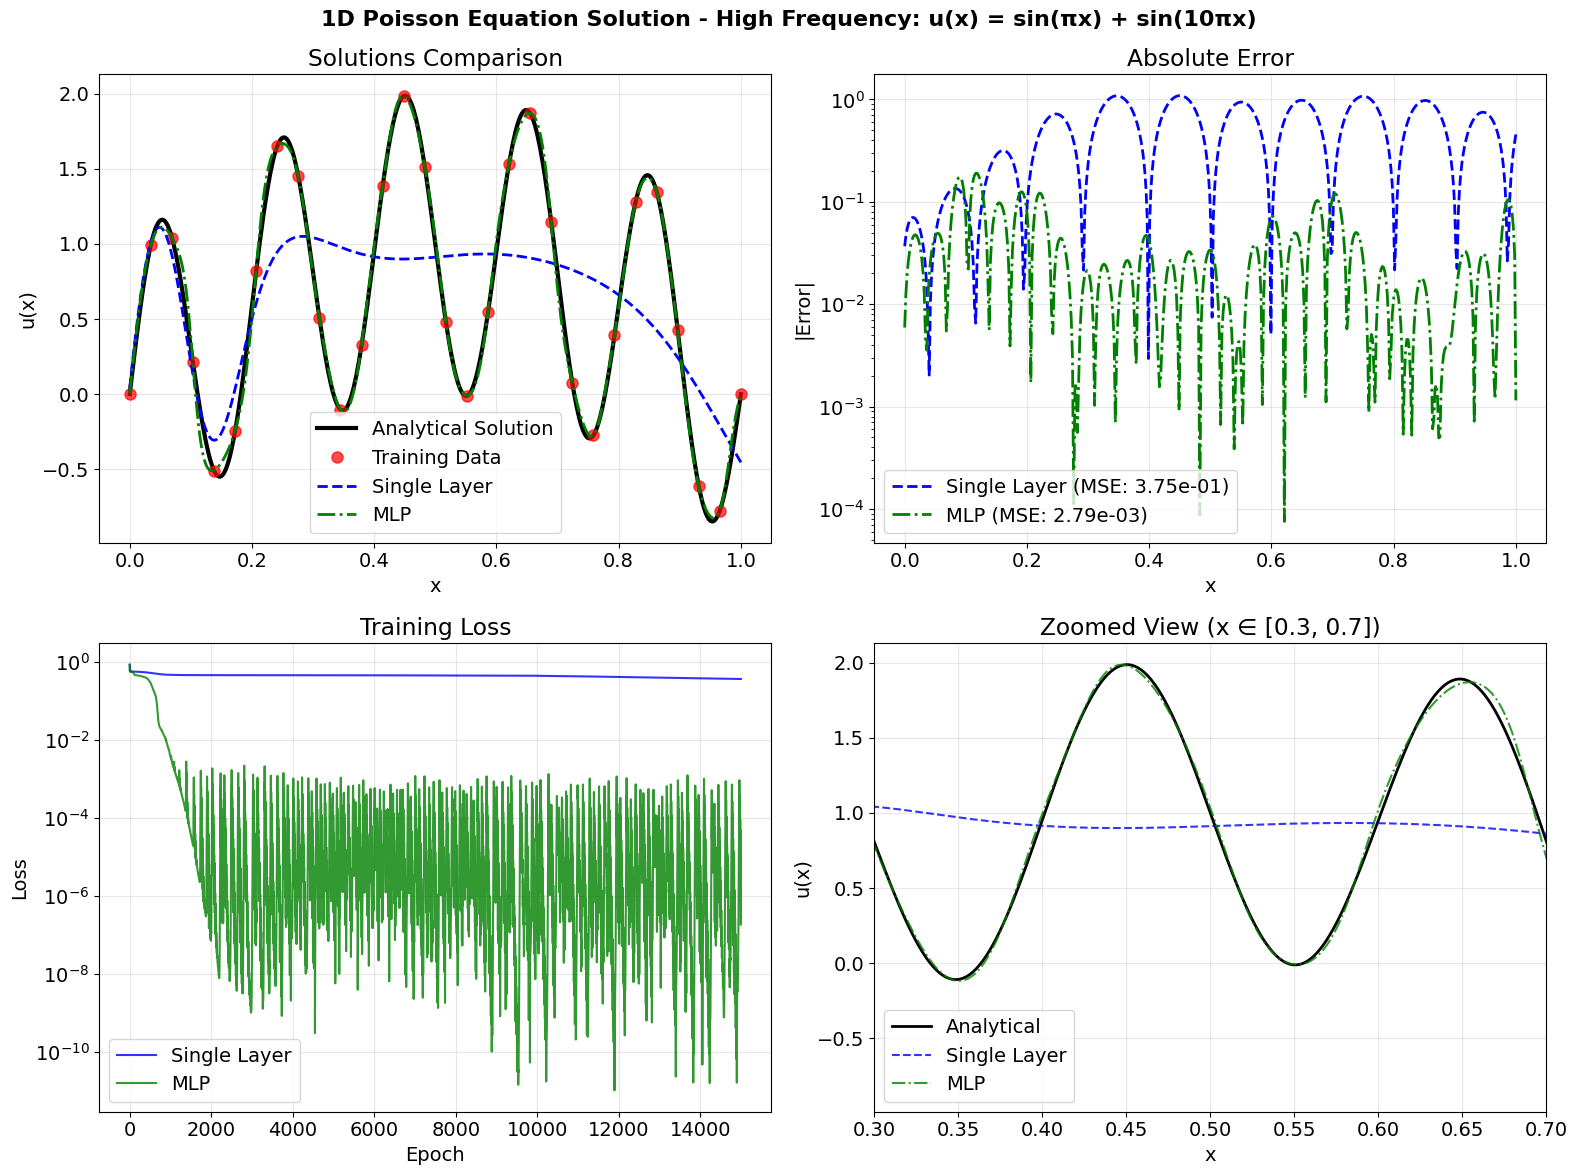


SUMMARY OF RESULTS
Simple Case (u = sin(πx)):
  Single Layer MSE: 0.00000121
  MLP MSE:          0.00000424
  Better model:     Single Layer

High Frequency Case (u = sin(πx) + sin(10πx)):
  Single Layer MSE: 0.37518552
  MLP MSE:          0.00279372
  Better model:     MLP

Key Observations:
- The high frequency case is significantly more challenging
- MLPs generally perform better on complex, high-frequency solutions
- Both models can approximate the simple sinusoidal solution well
- The high-frequency component requires more sophisticated architectures


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set up plot styles
plt.style.use('default')  # Using default instead of seaborn for compatibility
plt.rcParams.update({'font.size': 14, 'figure.figsize': (14, 10)})

# Set the random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# -----------------------------------------------------------------------------
# 1. Define Analytical Solutions and Source Functions
# -----------------------------------------------------------------------------

def analytical_solution_simple(x):
    """Original case: u(x) = sin(pi*x)"""
    return np.sin(np.pi * x)

def source_function_simple(x):
    """Original case: f(x) = pi^2 * sin(pi*x)"""
    return np.pi**2 * np.sin(np.pi * x)

def analytical_solution_high_freq(x):
    """High frequency case: u(x) = sin(pi*x) + sin(10*pi*x)"""
    return np.sin(np.pi * x) + np.sin(10 * np.pi * x)

def source_function_high_freq(x):
    """High frequency case: f(x) = pi^2*sin(pi*x) + 100*pi^2*sin(10*pi*x)"""
    return np.pi**2 * np.sin(np.pi * x) + 100 * np.pi**2 * np.sin(10 * np.pi * x)

# -----------------------------------------------------------------------------
# 2. Generate Training Data
# -----------------------------------------------------------------------------

def generate_training_data(solution_func, num_points=20):
    """Generate training data for a given analytical solution"""
    x_train = torch.linspace(0, 1, num_points, dtype=torch.float32).view(-1, 1)
    u_train = torch.tensor(solution_func(x_train.numpy().flatten()), dtype=torch.float32).view(-1, 1)
    return x_train, u_train

# Generate data for both cases
x_train_simple, u_train_simple = generate_training_data(analytical_solution_simple, 20)
x_train_high_freq, u_train_high_freq = generate_training_data(analytical_solution_high_freq, 30)

print(f"Generated training data:")
print(f"Simple case: {len(x_train_simple)} points")
print(f"High frequency case: {len(x_train_high_freq)} points")

# -----------------------------------------------------------------------------
# 3. Define Neural Network Models
# -----------------------------------------------------------------------------

class SingleLayer(nn.Module):
    """Single layer neural network"""
    def __init__(self, input_size=1, output_size=1, hidden_size=50):
        super(SingleLayer, self).__init__()
        self.linear = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.output = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        x = self.output(x)
        return x

class MLP(nn.Module):
    """Multi-layer perceptron"""
    def __init__(self, input_size=1, output_size=1, hidden_sizes=[50, 50, 50]):
        super(MLP, self).__init__()
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.Tanh())
        
        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.Tanh())
        
        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

# -----------------------------------------------------------------------------
# 4. Training Function
# -----------------------------------------------------------------------------

def train_model(model, x_data, y_data, epochs=10000, lr=0.01, print_interval=2000):
    """Train a neural network model"""
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} ---")
    
    losses = []
    for epoch in range(epochs):
        # Forward pass
        predictions = model(x_data)
        loss = criterion(predictions, y_data)
        
        # Check for NaN
        if torch.isnan(loss):
            print(f"Loss is NaN at epoch {epoch}. Stopping training.")
            break
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}')
    
    print(f"Training {model_name} complete. Final loss: {losses[-1]:.8f}")
    return model, losses

# -----------------------------------------------------------------------------
# 5. Train Models for Both Cases
# -----------------------------------------------------------------------------

def train_and_compare(x_train, u_train, case_name, analytical_func):
    """Train both single layer and MLP models and compare results"""
    print(f"\n{'='*60}")
    print(f"TRAINING MODELS FOR {case_name.upper()}")
    print(f"{'='*60}")
    
    # Initialize models
    torch.manual_seed(seed)
    single_layer = SingleLayer(hidden_size=100)
    
    torch.manual_seed(seed)
    mlp = MLP(hidden_sizes=[100, 100, 50])
    
    # Train models
    single_layer_trained, single_losses = train_model(single_layer, x_train, u_train, epochs=15000, lr=0.001)
    mlp_trained, mlp_losses = train_model(mlp, x_train, u_train, epochs=15000, lr=0.001)
    
    # Generate test data for plotting
    x_plot = torch.linspace(0, 1, 500, dtype=torch.float32).view(-1, 1)
    u_true_plot = analytical_func(x_plot.numpy().flatten())
    
    # Get predictions
    with torch.no_grad():
        u_pred_single = single_layer_trained(x_plot).numpy().flatten()
        u_pred_mlp = mlp_trained(x_plot).numpy().flatten()
    
    # Calculate errors
    error_single = np.mean((u_pred_single - u_true_plot)**2)
    error_mlp = np.mean((u_pred_mlp - u_true_plot)**2)
    
    print(f"\nFinal MSE - Single Layer: {error_single:.8f}")
    print(f"Final MSE - MLP: {error_mlp:.8f}")
    
    return {
        'x_plot': x_plot.numpy().flatten(),
        'u_true': u_true_plot,
        'u_pred_single': u_pred_single,
        'u_pred_mlp': u_pred_mlp,
        'x_train': x_train.numpy().flatten(),
        'u_train': u_train.numpy().flatten(),
        'single_losses': single_losses,
        'mlp_losses': mlp_losses,
        'error_single': error_single,
        'error_mlp': error_mlp
    }

# Train models for both cases
results_simple = train_and_compare(x_train_simple, u_train_simple, "Simple Case", analytical_solution_simple)
results_high_freq = train_and_compare(x_train_high_freq, u_train_high_freq, "High Frequency Case", analytical_solution_high_freq)

# -----------------------------------------------------------------------------
# 6. Visualization
# -----------------------------------------------------------------------------

def plot_results(results, title, case_name):
    """Plot comparison of analytical solution vs neural network predictions"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{title} - {case_name}', fontsize=16, fontweight='bold')
    
    # Main comparison plot
    ax1.plot(results['x_plot'], results['u_true'], 'k-', label='Analytical Solution', linewidth=3)
    ax1.plot(results['x_train'], results['u_train'], 'ro', label='Training Data', markersize=8, alpha=0.7)
    ax1.plot(results['x_plot'], results['u_pred_single'], 'b--', label='Single Layer', linewidth=2)
    ax1.plot(results['x_plot'], results['u_pred_mlp'], 'g-.', label='MLP', linewidth=2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('u(x)')
    ax1.set_title('Solutions Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Error plot
    error_single = np.abs(results['u_pred_single'] - results['u_true'])
    error_mlp = np.abs(results['u_pred_mlp'] - results['u_true'])
    ax2.plot(results['x_plot'], error_single, 'b--', label=f'Single Layer (MSE: {results["error_single"]:.2e})', linewidth=2)
    ax2.plot(results['x_plot'], error_mlp, 'g-.', label=f'MLP (MSE: {results["error_mlp"]:.2e})', linewidth=2)
    ax2.set_xlabel('x')
    ax2.set_ylabel('|Error|')
    ax2.set_title('Absolute Error')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')
    
    # Training loss curves
    ax3.plot(results['single_losses'], 'b-', label='Single Layer', alpha=0.8)
    ax3.plot(results['mlp_losses'], 'g-', label='MLP', alpha=0.8)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Loss')
    ax3.set_title('Training Loss')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')
    
    # Zoomed view of solution (for high frequency case)
    ax4.plot(results['x_plot'], results['u_true'], 'k-', label='Analytical', linewidth=2)
    ax4.plot(results['x_plot'], results['u_pred_single'], 'b--', label='Single Layer', linewidth=1.5, alpha=0.8)
    ax4.plot(results['x_plot'], results['u_pred_mlp'], 'g-.', label='MLP', linewidth=1.5, alpha=0.8)
    ax4.set_xlim(0.3, 0.7)  # Zoom into middle section
    ax4.set_xlabel('x')
    ax4.set_ylabel('u(x)')
    ax4.set_title('Zoomed View (x ∈ [0.3, 0.7])')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot results
plot_results(results_simple, "1D Poisson Equation Solution", "Simple Case: u(x) = sin(πx)")
plot_results(results_high_freq, "1D Poisson Equation Solution", "High Frequency: u(x) = sin(πx) + sin(10πx)")

# -----------------------------------------------------------------------------
# 7. Summary
# -----------------------------------------------------------------------------

print(f"\n{'='*80}")
print("SUMMARY OF RESULTS")
print(f"{'='*80}")
print(f"Simple Case (u = sin(πx)):")
print(f"  Single Layer MSE: {results_simple['error_single']:.8f}")
print(f"  MLP MSE:          {results_simple['error_mlp']:.8f}")
print(f"  Better model:     {'MLP' if results_simple['error_mlp'] < results_simple['error_single'] else 'Single Layer'}")

print(f"\nHigh Frequency Case (u = sin(πx) + sin(10πx)):")
print(f"  Single Layer MSE: {results_high_freq['error_single']:.8f}")
print(f"  MLP MSE:          {results_high_freq['error_mlp']:.8f}")
print(f"  Better model:     {'MLP' if results_high_freq['error_mlp'] < results_high_freq['error_single'] else 'Single Layer'}")

print(f"\nKey Observations:")
print(f"- The high frequency case is significantly more challenging")
print(f"- MLPs generally perform better on complex, high-frequency solutions")
print(f"- Both models can approximate the simple sinusoidal solution well")
print(f"- The high-frequency component requires more sophisticated architectures")